In [221]:
#This program generates FIG. 2A, 2B, 2C
#Fig2: Mean firing rates in the spontanous and feedforward conditions.
#Fig2A: Perturabtion matrix in the spontaneous condition
#Fig2B: Perturabtion matrix in the feedforward condition
#Fig2C: Comparison Perturabtion matrix in the feedforward condition and spontaneous

In [222]:
#Import some libraries 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize

In [223]:
#Importing some info I need 
runtime=np.loadtxt("../general_files/runtime.txt")*1000 #Runtime of the simulations

#Number of neurons for each type in each of the 4 layers
N= (np.loadtxt("../general_files/N.txt").reshape(4, 4)).astype(int)
Ntot=5000
#In layer 1: 
N1=int(0.0192574218*Ntot)
#print(N1)

#Print Some information about the mdodel
print("The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1")
print("Total number of neurons in the column: %s + %s \n85 perc excitatory and 15 perc inhibitory \nIn each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   "%(Ntot,N1))
print("Number of neurons for each type in each of the 4 layers:")
print(N)
print("The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6")


The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1
Total number of neurons in the column: 5000 + 96 
85 perc excitatory and 15 perc inhibitory 
In each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   
Number of neurons for each type in each of the 4 layers:
[[1236   65   47  107]
 [1010   98   53   27]
 [ 741   63   56   11]
 [1263  102  102   19]]
The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6


In [224]:
#------------------------------------------------------------------------------
# Import the files 
#------------------------------------------------------------------------------

#This funciton takes the name of the folder and import all the spike data 
#The function returns the number of spikes for each group of neurons 

def take_files(a):
    
    #layer1
    S_vip1num_spikes=np.array(np.loadtxt(a+'/S_vip1numspike.txt') )

    #layer23
    S_e23num_spikes=np.array(np.loadtxt(a+'/S_e23numspike.txt') )
    S_pv23num_spikes=np.array(np.loadtxt(a+'/S_pv23numspike.txt') )
    S_sst23num_spikes=np.array(np.loadtxt(a+'/S_sst23numspike.txt') )
    S_vip23num_spikes=np.array(np.loadtxt(a+'/S_vip23numspike.txt') )

    #layer4
    S_e4num_spikes=np.array(np.loadtxt(a+'/S_e4numspike.txt') )
    S_pv4num_spikes=np.array(np.loadtxt(a+'/S_pv4numspike.txt') )
    S_sst4num_spikes=np.array(np.loadtxt(a+'/S_sst4numspike.txt') )
    S_vip4num_spikes=np.array(np.loadtxt(a+'/S_vip4numspike.txt') )

    #layer5
    S_e5num_spikes=np.array(np.loadtxt(a+'/S_e5numspike.txt') )
    S_pv5num_spikes=np.array(np.loadtxt(a+'/S_pv5numspike.txt') )
    S_sst5num_spikes=np.array(np.loadtxt(a+'/S_sst5numspike.txt') )
    S_vip5num_spikes=np.array(np.loadtxt(a+'/S_vip5numspike.txt') )

    #layer6
    S_e6num_spikes=np.array(np.loadtxt(a+'/S_e6numspike.txt') )
    S_pv6num_spikes=np.array(np.loadtxt(a+'/S_pv6numspike.txt') )
    S_sst6num_spikes=np.array(np.loadtxt(a+'/S_sst6numspike.txt') )
    S_vip6num_spikes=np.array(np.loadtxt(a+'/S_vip6numspike.txt') ) 
    
    return S_vip1num_spikes,S_e4num_spikes,S_pv4num_spikes,S_sst4num_spikes,S_vip4num_spikes,S_e5num_spikes,S_pv5num_spikes,S_sst5num_spikes,S_vip5num_spikes, S_e6num_spikes,S_pv6num_spikes,S_sst6num_spikes,S_vip6num_spikes,S_e23num_spikes,S_pv23num_spikes,S_sst23num_spikes,S_vip23num_spikes

In [225]:
#------------------------------------------------------------------------------
# Compute the rates for all the neuron groups 
#------------------------------------------------------------------------------

#Funciton to compute the mean firing rates for all the neuron groups given the number spikes 
def compute_FR(N,N1,runtime,S_vip1num_spikes,
              S_e4num_spikes,S_pv4num_spikes,S_sst4num_spikes,S_vip4num_spikes,
              S_e5num_spikes,S_pv5num_spikes,S_sst5num_spikes,S_vip5num_spikes,
              S_e6num_spikes,S_pv6num_spikes,S_sst6num_spikes,S_vip6num_spikes,
             S_e23num_spikes,S_pv23num_spikes,S_sst23num_spikes,S_vip23num_spikes):

    #runtime must be in seconds (it is in ms now)
    runtime=runtime/1000
    tot_sp_vip1 =  S_vip1num_spikes  #Layer 2/3
    rate_vip1= tot_sp_vip1/(N1*runtime)

    print("runtime: %s" %runtime)
    tot_sp_e23 =  S_e23num_spikes  #Layer 2/3
    #print(tot_sp_e23)
    #print(tot_sp_e23)
    #print(N[0][0])
    # Total number of spikes and rate for each group:
    rate_e23= tot_sp_e23/(N[0][0]*runtime)
    tot_sp_pv23 =  S_pv23num_spikes
    rate_pv23= tot_sp_pv23/(N[0][1]*runtime)
    tot_sp_sst23 =  S_sst23num_spikes
    rate_sst23= tot_sp_sst23/(N[0][2]*runtime)
    tot_sp_vip23 =  S_vip23num_spikes
    rate_vip23= tot_sp_vip23/(N[0][3]*runtime)
    #print(tot_sp_vip23)

    tot_sp_e4 =  S_e4num_spikes
    rate_e4= tot_sp_e4/(N[1][0]*runtime)
    tot_sp_pv4 =  S_pv4num_spikes
    rate_pv4= tot_sp_pv4/(N[1][1]*runtime)
    tot_sp_sst4 =  S_sst4num_spikes
    rate_sst4= tot_sp_sst4/(N[1][2]*runtime)
    tot_sp_vip4 =  S_vip4num_spikes
    rate_vip4= tot_sp_vip4/(N[1][3]*runtime)

    tot_sp_e5 =  S_e5num_spikes
    rate_e5= tot_sp_e5/(N[2][0]*runtime)
    tot_sp_pv5 =  S_pv5num_spikes
    rate_pv5= tot_sp_pv5/(N[2][1]*runtime)
    tot_sp_sst5 =  S_sst5num_spikes
    rate_sst5= tot_sp_sst5/(N[2][2]*runtime)
    tot_sp_vip5 =  S_vip5num_spikes
    rate_vip5= tot_sp_vip5/(N[2][3]*runtime)


    tot_sp_e6 =  S_e6num_spikes
    rate_e6= tot_sp_e6/(N[3][0]*runtime)
    tot_sp_pv6 =  S_pv6num_spikes
    rate_pv6= tot_sp_pv6/(N[3][1]*runtime)
    tot_sp_sst6 =  S_sst6num_spikes
    rate_sst6= tot_sp_sst6/(N[3][2]*runtime)
    tot_sp_vip6 =  S_vip6num_spikes
    rate_vip6= tot_sp_vip6/(N[3][3]*runtime)
    
    print("-----------------------Computing the firing rates--------------------------------")
    print('rate_vip1: %f'%(rate_vip1))
    print('rate_e23: %f rate_pv23: %f rate_sst23: %f rate_vip23: %f'%(rate_e23,rate_pv23,rate_sst23,rate_vip23))
    print('rate_e4: %f rate_pv4: %f rate_sst4: %f rate_vip4: %f'%(rate_e4,rate_pv4,rate_sst4,rate_vip4))
    print('rate_e5: %f rate_pv5: %f rate_sst5: %f rate_vip5: %f'%(rate_e5,rate_pv5,rate_sst5,rate_vip5))
    print('rate_e6: %f rate_pv6: %f rate_sst6: %f rate_vip6: %f'%(rate_e6,rate_pv6,rate_sst6,rate_vip6))
    
    return rate_e23,rate_pv23,rate_sst23,rate_vip23,rate_e4,rate_pv4,rate_sst4,rate_vip4,rate_e5,rate_pv5,rate_sst5,rate_vip5,rate_e6,rate_pv6,rate_sst6,rate_vip6


In [277]:
#Define the files containing the needed data 

#This is for the Spontanous case (Fig 2A)
#folder_state='../simulations_data/In_spontaneuous/i_none/Sp_0'
#folder_input='../simulations_data/In_spontaneuous/i16/Sp_1'

#This is for the FF case (Fig 2B)
# folder_state='../simulations_data/In_with_e4/i_input4/Sp_1'
# folder_input='../simulations_data/In_with_e4/i1/Sp_1'



#folder_input='../simulations_data/Sp_input_ff25_5pv_150' #FF input              #Fig. 1D
#folder_input='../simulations_data/Sp_input_ff25_5pv_170' #FF input              #Fig. 1D
#folder_input='../simulations_data/Sp_input_fb25_5pv_170' #FF input              #Fig. 1D


#SPONTANOUS with and without probability changed
#folder_state='../simulations_data/REVISIONS/Sp_input_e4_0pA_e5_0pA'
#folder_state='../simulations_data/REVISIONS/Sp_input_probChanged0.6_e4_0pA25%_e5_0pA_25%'
#folder_state='../simulations_data/REVISIONS/Sp_input_probChanged1.4_e4_0pA100%_e5_0pA_25%'


#EVOKED with and without probability changed

#folder_state='../simulations_data/REVISIONS/Sp_input_e4_30pA100%_e5_0pA_25%'
#folder_state='../simulations_data/REVISIONS/Sp_input_probChanged0.6_e4_30pA100%_e5_0pA_25%'

#Evoked 150 to 25%
#folder_state='../simulations_data/REVISIONS/Sp_input_e4_150pA25%_e5_0pA_25%'


#folder_state='../simulations_data/REVISIONS/Sp_input_probChanged60_e4_30pA100%_e5_0pA_25%' #FF 

#REVISIONS_1 #final simulations 
folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_0pA_e5_0pA_e23_0pA_e6_0pA" #spontfolder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_0pA_e5_0pA_e23_0pA_e6_150pA" #input L6



# folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_0pA_e5_0pA_e23_150pA_e6_0pA" #input L2/3
# folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_0pA_e5_150pA_e23_0pA_e6_0pA" #input L5
# folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_0pA_e5_150pA_e23_150pA_e6_0pA" #input L5, L2/3
# folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_0pA_e5_150pA_e23_150pA_e6_150pA" #input L5, L2/3, L6
#folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_150pA_e5_0pA_e23_0pA_e6_0pA" #input to L4
# folder_state = "../simulations_data/REVISIONS_1/Sp_input_e4_150pA25%_e5_150pA_25%" #input to L4 & L5 



folder_input = "../simulations_data/REVISIONS_1/Sim_e4_0pA_e5_0pA_e23_0pA_e6_0pA/e23" #spont
#folder_input ="../simulations_data/REVISIONS_1/Sim_e4_150pA_e5_0pA_pert_30pA/e23"

In [278]:
# Import the files in which no input is given, spontaneous activity 
S_vip1num_spikes_0,S_e4num_spikes_0,S_pv4num_spikes_0,S_sst4num_spikes_0,S_vip4num_spikes_0,S_e5num_spikes_0,S_pv5num_spikes_0,S_sst5num_spikes_0,S_vip5num_spikes_0,S_e6num_spikes_0,S_pv6num_spikes_0,S_sst6num_spikes_0,S_vip6num_spikes_0,S_e23num_spikes_0,S_pv23num_spikes_0,S_sst23num_spikes_0,S_vip23num_spikes_0=take_files(folder_state)

#Compute the mean firing rates for all the populations
rate_e23_0,rate_pv23_0,rate_sst23_0,rate_vip23_0,rate_e4_0,rate_pv4_0,rate_sst4_0,rate_vip4_0,rate_e5_0,rate_pv5_0,rate_sst5_0,rate_vip5_0,rate_e6_0,rate_pv6_0,rate_sst6_0,rate_vip6_0=compute_FR(N,N1,runtime,
S_vip1num_spikes_0,S_e4num_spikes_0,S_pv4num_spikes_0,S_sst4num_spikes_0,
S_vip4num_spikes_0,S_e5num_spikes_0,S_pv5num_spikes_0,S_sst5num_spikes_0,
S_vip5num_spikes_0,S_e6num_spikes_0,S_pv6num_spikes_0,S_sst6num_spikes_0,
S_vip6num_spikes_0,S_e23num_spikes_0,S_pv23num_spikes_0,S_sst23num_spikes_0,S_vip23num_spikes_0)

runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 0.993056
rate_e23: 0.268608 rate_pv23: 2.907692 rate_sst23: 3.234043 rate_vip23: 7.747664
rate_e4: 1.075248 rate_pv4: 3.928571 rate_sst4: 1.811321 rate_vip4: 1.024691
rate_e5: 2.053531 rate_pv5: 4.666667 rate_sst5: 3.589286 rate_vip5: 6.484848
rate_e6: 1.011876 rate_pv6: 5.104575 rate_sst6: 6.339869 rate_vip6: 3.315789


In [279]:
# Import the files in which input is given to one population (30pA)
S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1=take_files(folder_input)

#Compute the rates
rate_e23_1,rate_pv23_1,rate_sst23_1,rate_vip23_1,rate_e4_1,rate_pv4_1,rate_sst4_1,rate_vip4_1,rate_e5_1,rate_pv5_1,rate_sst5_1,rate_vip5_1,rate_e6_1,rate_pv6_1,rate_sst6_1,rate_vip6_1=compute_FR(N,N1,runtime,
S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,
S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,
S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,
S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1)

runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 1.145833
rate_e23: 6.503236 rate_pv23: 5.430769 rate_sst23: 6.787234 rate_vip23: 16.457944
rate_e4: 1.038614 rate_pv4: 8.642857 rate_sst4: 2.584906 rate_vip4: 6.049383
rate_e5: 3.150697 rate_pv5: 8.238095 rate_sst5: 5.577381 rate_vip5: 6.484848
rate_e6: 0.880443 rate_pv6: 6.261438 rate_sst6: 6.343137 rate_vip6: 3.964912


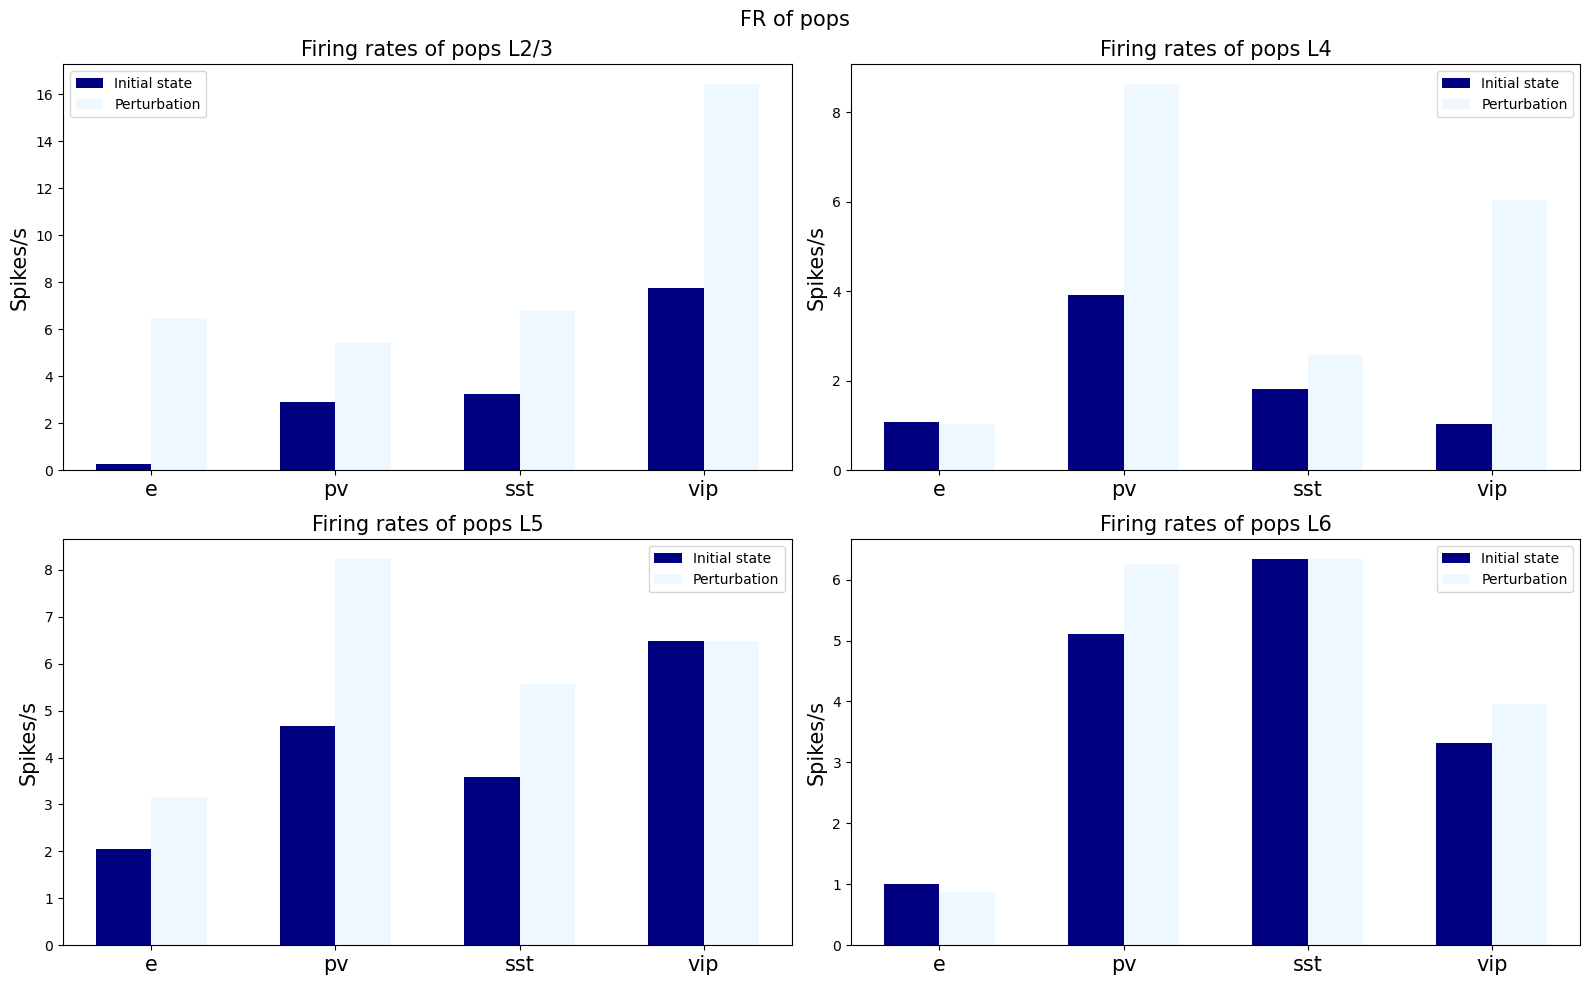

In [280]:
#Plot of firing rates of one particular situation where the perturbative input is given to one population
#in comparison with case without the input

#Data to plot
#Firing rates with the input
model_means23 = [rate_e23_1,rate_pv23_1,rate_sst23_1,rate_vip23_1]
model_means4= [rate_e4_1,rate_pv4_1,rate_sst4_1,rate_vip4_1]
model_means5= [rate_e5_1,rate_pv5_1,rate_sst5_1,rate_vip5_1]
model_means6 = [rate_e6_1,rate_pv6_1,rate_sst6_1,rate_vip6_1]

#Firinr rates without the input
base_means23 = [rate_e23_0,rate_pv23_0,rate_sst23_0,rate_vip23_0]
base_means4= [rate_e4_0,rate_pv4_0,rate_sst4_0,rate_vip4_0]
base_means5= [rate_e5_0,rate_pv5_0,rate_sst5_0,rate_vip5_0]
base_means6 = [rate_e6_0,rate_pv6_0,rate_sst6_0,rate_vip6_0]


#Lables for the plot 
labels = ['e','pv', 'sst', 'vip']
x = np.arange(len(labels))  # the label locations
w = 0.3  # the width of the bars
width=0.3

#Create the plot
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(16,10))

f.suptitle('FR of pops',fontsize=15)
rects1_23 = ax1.bar(x - width/2, base_means23, width=w, label='Initial state')
rects2_23 = ax1.bar(x + width/2, model_means23, width=w, label='Perturbation')

rects1_4 = ax2.bar(x - width/2, base_means4, width=w, label='Initial state')
rects2_4 = ax2.bar(x + width/2, model_means4, width=w, label='Perturbation')

rects1_5 = ax3.bar(x - width/2, base_means5, width=w, label='Initial state')
rects2_5 = ax3.bar(x + width/2, model_means5, width=w, label='Perturbation')

rects1_6 = ax4.bar(x - width/2, base_means6, width=w, label='Initial state')
rects2_6 = ax4.bar(x + width/2, model_means6, width=w, label='Perturbation')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Spikes/s', fontsize=15)
ax1.set_title('Firing rates of pops L2/3',fontsize=15)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, fontsize=15)
ax1.legend()

ax2.set_ylabel('Spikes/s', fontsize=15)
ax2.set_title('Firing rates of pops L4',fontsize=15)
ax2.set_xticks(x)
ax2.set_xticklabels(labels, fontsize=15)
ax2.legend()

ax3.set_ylabel('Spikes/s', fontsize=15)
ax3.set_title('Firing rates of pops L5',fontsize=15)
ax3.set_xticks(x)
ax3.set_xticklabels(labels, fontsize=15)
ax3.legend()

ax4.set_ylabel('Spikes/s', fontsize=15)
ax4.set_title('Firing rates of pops L6',fontsize=15)
ax4.set_xticks(x)
ax4.set_xticklabels(labels, fontsize=15)
ax4.legend()

f.tight_layout()

plt.show()

In [281]:
#Here I generate the plots in Fig. 2A, 2B (right panels). 
#Mean firing rates in the state before the perturbative input and after it.
#Perturbative input to E2/3, effect observed on layer 5
#Spontaenous (Fig.2A) and FF case (Fig.2B) 

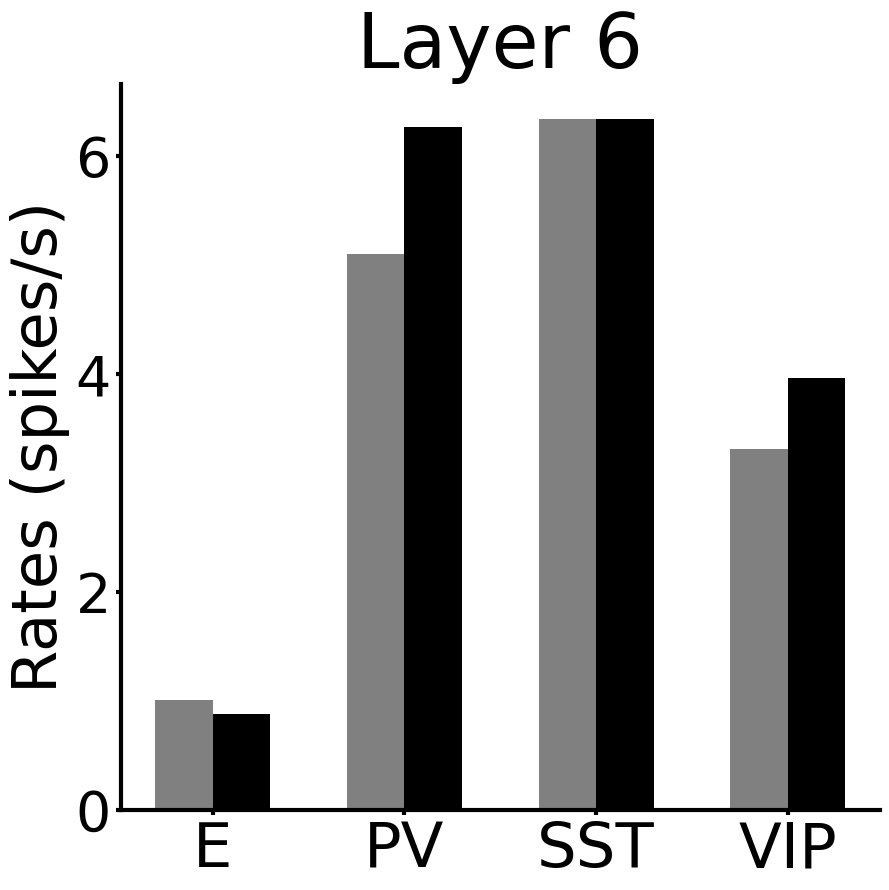

In [282]:
#Fig2: Mean firing rates in the spontanous and in the condition with perturbative input to one population (E2/3).
#Fig2: Mean firing rates in the FF state and in the condition with perturbative input to one population (E2/3).

#Layer 5 only is shown

#Data to plot
#model_means5= [rate_e5_1,rate_pv5_1,rate_sst5_1,rate_vip5_1]
#base_means5= [rate_e5_0,rate_pv5_0,rate_sst5_0,rate_vip5_0]


model_means5= [rate_e6_1,rate_pv6_1,rate_sst6_1,rate_vip6_1]
base_means5= [rate_e6_0,rate_pv6_0,rate_sst6_0,rate_vip6_0]




#Labels for the plot
labels = ['E','PV', 'SST', 'VIP']
x = np.arange(len(labels))  # the label locations
w = 0.3  # the width of the bars
width=0.3

#Plot 
f, ax = plt.subplots(figsize=(9,9))
#to plot the Spontanous case
ax.bar(x - width/2, base_means5, width=w,color='grey', alpha=1, label='Spontaneous')
ax.bar(x + width/2, model_means5, width=w,color='black', alpha=1, label='Spontaneous + Input E2/3')

#to plot the FF case
# ax.bar(x - width/2, base_means5, width=w,color='grey', alpha=1, label='FF')
# ax.bar(x + width/2, model_means5, width=w,color='black', alpha=1, label='FF + Input E2/3')


#Layout
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
ax.set_ylabel('Rates (spikes/s)', fontsize=45)
ax.set_title('Layer 6',fontsize=55)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=45)
plt.yticks(fontsize=40)
plt.locator_params(axis='y', nbins=5)

ax.tick_params(top=False,
       bottom=True,
       left=True,
       right=False,
       labelleft=True,
       labelbottom=True)

plt.setp(ax.spines.values(), linewidth=3) #linewidth of the plot
plt.gca().spines['right'].set_color('none') #No box of the plot
plt.gca().spines['top'].set_color('none')

#Legend
#For Spontanous case (Fig 2A): 
#ax.legend(fontsize=31)
#For FF case (Fig 2B): 
#ax.legend(loc='upper right',bbox_to_anchor=(1, 1), fontsize=31) 

#ax.legend(loc='best', fontsize=15) 


f.tight_layout()

#Save the fig
plt.savefig('../IMAGES/REVISIONS_1/fig2_bar_spont_layer6_v1.png') #(Fig 2A)
#plt.savefig('../IMAGES/REVISIONS_1/fig2_bar_FF_layer6_v1.png')     #(Fig 2B)

plt.show()



In [146]:
#From here I create the plots for the perturbation matrix 

#For the spont. case (Fig 2A):
#folder_data='../simulations_data/In_spontaneuous'
#For the FF case (Fig 2B):
#folder_data='../simulations_data/In_with_e4'



#folder_data = "../simulations_data/REVISIONS_1/Sim_e4_0pA_e5_0pA_e23_0pA_e6_0pA" #spont
#folder_data = "../simulations_data/REVISIONS_1/Sim_e4_0pA_e5_0pA_e23_0pA_e6_150pA" #input L6
#folder_data = "../simulations_data/REVISIONS_1/Sim_e4_0pA_e5_0pA_e23_150pA_e6_0pA" #input L2/3

#folder_data = "../simulations_data/REVISIONS_1/Sim_e4_0pA_e5_150pA_pert_30pA" #input L5

#folder_data = "../simulations_data/REVISIONS_1/Sim_e4_0pA_e5_150pA_e23_150pA_e6_0pA" #input L5, L2/3
#folder_data = "../simulations_data/REVISIONS_1/Sim_e4_0pA_e5_150pA_e23_150pA_e6_150pA" #input L5, L2/3, L6

folder_data = "../simulations_data/REVISIONS_1/Sim_e4_150pA_e5_0pA_pert_30pA" #input to L4
#folder_data = "../simulations_data/REVISIONS_1/Sim_e4_150pA_e5_150pA_pert_30pA" #input to L4 & L5 



In [147]:
#I create the matrix that will contain the firing rate of each population in that particular simulation
#The input is given to one different population for every simulation.

Matrix_all=[] #create empty array

for i in ['e23','pv23','sst23','vip23','e4','pv4','sst4','vip4','e5','pv5','sst5','vip5','e6','pv6','sst6','vip6']:
    #i1 contains the data of the simualtion with perturbative input to first population (E2/3),
    #i2 (input to PV2/3), etc. 
    #I have 16 simulations: input to one population in each simualtion (16 populations in total)
    
    #Import the data of one simulation 'i'
    S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1=take_files(folder_data+'/'+i)
    
    #compute the rates 
    rate_e23_1,rate_pv23_1,rate_sst23_1,rate_vip23_1,rate_e4_1,rate_pv4_1,rate_sst4_1,rate_vip4_1,rate_e5_1,rate_pv5_1,rate_sst5_1,rate_vip5_1,rate_e6_1,rate_pv6_1,rate_sst6_1,rate_vip6_1=compute_FR(N,N1,runtime,
    S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,
    S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,
    S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,
    S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1)


    #PERCENTAGE CHANGE of the FR of EACH population (I compare to the value before the input)
    dif_e23=(rate_e23_1 - rate_e23_0)/ rate_e23_0
    dif_pv23=(rate_pv23_1 - rate_pv23_0) / rate_pv23_0
    dif_sst23=(rate_sst23_1 - rate_sst23_0) / rate_sst23_0
    dif_vip23= (rate_vip23_1 - rate_vip23_0)/rate_vip23_0
    dif_e4=(rate_e4_1 - rate_e4_0 )/rate_e4_0
    dif_pv4=(rate_pv4_1 - rate_pv4_0) /rate_pv4_0
    dif_sst4=(rate_sst4_1 - rate_sst4_0) /rate_sst4_0
    dif_vip4=(rate_vip4_1 - rate_vip4_0) /rate_vip4_0
    dif_e5=(rate_e5_1 - rate_e5_0) /rate_e5_0
    dif_pv5=(rate_pv5_1 - rate_pv5_0) /rate_pv5_0
    dif_sst5=(rate_sst5_1 - rate_sst5_0) /rate_sst5_0
    dif_vip5=(rate_vip5_1 - rate_vip5_0) /rate_vip5_0
    dif_e6=(rate_e6_1 - rate_e6_0) /rate_e6_0
    dif_pv6=(rate_pv6_1 - rate_pv6_0) /rate_pv6_0
    dif_sst6=(rate_sst6_1 - rate_sst6_0) /rate_sst6_0
    dif_vip6=(rate_vip6_1 - rate_vip6_0) /rate_vip6_0
    
    #I create the first row of the matrix containing all the rates
    dif_row=[dif_e23,dif_pv23,dif_sst23,dif_vip23,
            dif_e4,dif_pv4,dif_sst4,dif_vip4,
             dif_e5,dif_pv5,dif_sst5,dif_vip5,
             dif_e6,dif_pv6,dif_sst6,dif_vip6]
    
    Matrix_all.append(dif_row) #Fill the matrix with the data you computed
    

#Save the matrix in one file
#f=open('../simulations_data/matrix/MATRIX_baseline.txt','w+') #create the file to write the values of the matrix
#f=open('../simulations_data/matrix/MATRIX_inpute4.txt','w+') #create the file to write the values of the matrix


#f=open('../simulations_data/REVISIONS_1/matrix/MATRIX_spont.txt','w+') #create the file to write the values of the matrix

#f=open('../simulations_data/REVISIONS_1/matrix/MATRIX_L6.txt','w+') #create the file to write the values of the matrix
# f=open('../simulations_data/REVISIONS_1/matrix/MATRIX_L23.txt','w+') #create the file to write the values of the matrix
# f=open('../simulations_data/REVISIONS_1/matrix/MATRIX_L5.txt','w+') #create the file to write the values of the matrix
# f=open('../simulations_data/REVISIONS_1/matrix/MATRIX_L5_L23.txt','w+') #create the file to write the values of the matrix
# f=open('../simulations_data/REVISIONS_1/matrix/MATRIX_L5_L23_L6.txt','w+') #create the file to write the values of the matrix
f=open('../simulations_data/REVISIONS_1/matrix/MATRIX_L4.txt','w+') #create the file to write the values of the matrix
# f=open('../simulations_data/REVISIONS_1/matrix/MATRIX_L4_L5.txt','w+') #create the file to write the values of the matrix



for i in range(0,16):
    for j in range(0,16):
        f.write('%f ' %Matrix_all[i][j]) # write the value in the i,j position of the matrix 
    f.write('\n')
f.close()

runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 0.968750
rate_e23: 6.549892 rate_pv23: 9.969231 rate_sst23: 9.567376 rate_vip23: 23.566978
rate_e4: 17.385809 rate_pv4: 16.370748 rate_sst4: 2.610063 rate_vip4: 8.234568
rate_e5: 3.114260 rate_pv5: 15.968254 rate_sst5: 8.446429 rate_vip5: 14.545455
rate_e6: 3.245711 rate_pv6: 10.513072 rate_sst6: 6.310458 rate_vip6: 4.649123
runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 0.767361
rate_e23: 0.262945 rate_pv23: 17.015385 rate_sst23: 5.312057 rate_vip23: 12.202492
rate_e4: 17.114191 rate_pv4: 9.748299 rate_sst4: 1.547170 rate_vip4: 1.790123
rate_e5: 2.050832 rate_pv5: 10.962963 rate_sst5: 5.916667 rate_vip5: 15.909091
rate_e6: 3.668778 rate_pv6: 10.055556 rate_sst6: 6.503268 rate_vip6: 4.228070
runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 0.684028
rate_e23: 0.313646 

In [178]:
#I import the matrix I just created

m_import=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_spont.txt')   #For spontaneous

# m_import=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L6.txt')   #L6
# m_import=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L23.txt')   #L23
# m_import=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L5.txt')   #L5
# m_import=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L5_L23.txt') #L5 & L23
# m_import=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L5_L23_L6.txt')   #L5 & L23 & L6

#m_import=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L4.txt')   #L4
# m_import=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L4_L5.txt')  #L4 & L5





In [179]:
#THis is to find the values for the color map
matrix=m_import
# Step 1: Identify positive values
positive_values = matrix[matrix > 0]

# Step 2: Sort the positive values
sorted_positive_values = np.sort(positive_values)
print(sorted_positive_values)
# Step 3: Select values at regular intervals
interval = int(len(sorted_positive_values)/5) # Example interval, you can choose the desired interval
selected_values = sorted_positive_values[interval::interval]
print(selected_values)

selected_values_new=(selected_values/(2*np.max(matrix)))+0.5
print(selected_values_new)



negative_values = matrix[matrix < 0]

# Step 2: Sort the positive values
sorted_negative_values = np.sort(negative_values)
print(sorted_negative_values)
# Step 3: Select values at regular intervals
interval_neg = int(len(sorted_negative_values)/4) # Example interval, you can choose the desired interval
selected_values_neg = sorted_negative_values[::interval_neg]
print(selected_values_neg)

selected_values_neg_new=0.5+(selected_values_neg/(2*np.max(matrix)))
print(selected_values_neg_new)

[5.1500000e-04 1.0310000e-03 4.3860000e-03 4.6730000e-03 4.8250000e-03
 5.2910000e-03 9.2000000e-03 1.0582000e-02 1.1476000e-02 1.6450000e-02
 1.8839000e-02 2.3711000e-02 2.5258000e-02 2.6455000e-02 3.5605000e-02
 6.0773000e-02 8.0321000e-02 8.5341000e-02 9.6992000e-02 1.2148600e-01
 1.2164900e-01 1.5192700e-01 1.7361100e-01 1.9237100e-01 1.9576700e-01
 1.9868600e-01 2.2663300e-01 2.3263900e-01 2.5602400e-01 2.7783500e-01
 3.0701800e-01 4.2708300e-01 4.6560800e-01 4.7089900e-01 4.9577800e-01
 5.3428300e-01 5.5389700e-01 6.0317500e-01 7.6530600e-01 7.8972000e-01
 8.6772500e-01 1.0164500e+00 1.0467290e+00 1.0986840e+00 1.1111110e+00
 1.1242460e+00 1.1587300e+00 1.2000000e+00 1.2018500e+00 1.4693880e+00
 1.5246750e+00 1.5262480e+00 1.5326280e+00 1.5401610e+00 1.5473750e+00
 1.6469300e+00 1.9018690e+00 1.9948780e+00 2.0895690e+00 2.1901890e+00
 2.2597940e+00 2.3253010e+00 2.3515150e+00 2.4546490e+00 2.4577460e+00
 2.4906540e+00 2.5291010e+00 3.2063490e+00 3.6788610e+00 3.8142930e+00
 4.298

In [180]:
# for i in range(0,16):
#     m_import[i][i]=0

#m_import[0][7]=0
#m_import[8][7]=0

#np.fill_diagonal(m_import, np.nan)

#m_import_1 = np.sign(m_import) * np.log(np.abs(m_import)) 
# for i in range(0,16):
#     for j in range(0,16):
#         print(m_import[i][j])
#         #m_import[i][j]= np.sign(m_import[i][j]) * np.log10(np.abs(m_import[i][j])) 
#         m_import[i][j]=np.sign(m_import[i][j])*np.sqrt(np.abs(m_import[i][j]))
#         print(m_import[i][j])



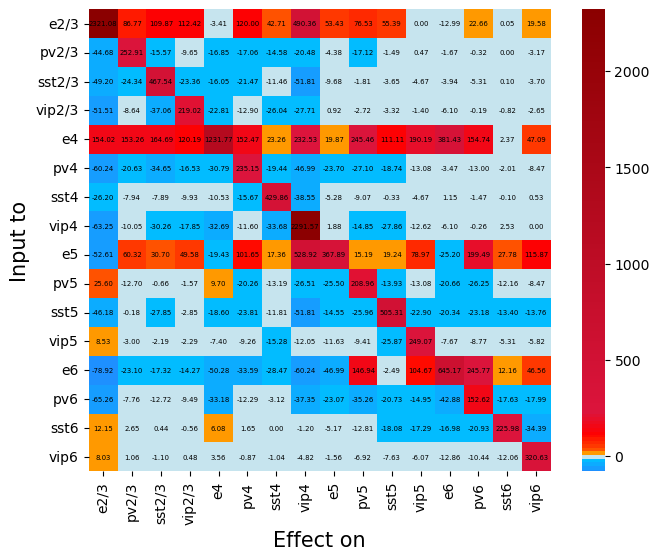

In [181]:
#Plot of the matrix
#Percentage change of the firing rate of each population as effect of the perturbation input to one population ("source population").
from matplotlib.colors import LinearSegmentedColormap

#create the figure
fig = plt.figure(figsize=(8, 6)) 
#labels
x_axis_labels = ['e2/3','pv2/3','sst2/3','vip2/3','e4','pv4','sst4','vip4','e5','pv5','sst5','vip5','e6','pv6','sst6','vip6'] # labels for x-axis
y_axis_labels = ['e2/3','pv2/3','sst2/3','vip2/3','e4','pv4','sst4','vip4','e5','pv5','sst5','vip5','e6','pv6','sst6','vip6'] # labels for x-axis

# colors = [(0, 'blue'),
#           (selected_values_neg_new[0], 'blue'),
#           (selected_values_neg_new[1], 'deepskyblue'),
#           (selected_values_neg_new[2], 'lightblue'),
#           (0.5, 'white'), 
#           (selected_values_new[0], 'yellow'),
#           (selected_values_new[1], 'orange'),
#           (selected_values_new[2], 'red'),
#           (selected_values_new[3], 'darkred'), 
#           (1, 'black')]

colors = [(0, 'darkblue'),
          (selected_values_neg_new[0], 'dodgerblue'),
          (selected_values_neg_new[1], 'deepskyblue'),
          (selected_values_neg_new[2], 'lightblue'),
          (0.5, 'white'), 
          (selected_values_new[0], 'orange'),
          (selected_values_new[1], 'orangered'),
          (selected_values_new[2], 'red'),
          (selected_values_new[3], 'crimson'), 
          (1, 'darkred')]

# Create a colormap that maps the given colors to values between 0 and 1
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

norm = plt.Normalize(vmin=np.min(m_import)*100, vmax=np.max(m_import)*100)


mA_plot = sns.heatmap(np.array(m_import)*100,annot=True,norm=norm,center=0,square=True,cmap=custom_cmap,xticklabels=x_axis_labels, yticklabels=y_axis_labels,mask=np.isnan(m_import),fmt=".2f", annot_kws={"size": 5, "color": "black"}) # plot with heatmap
mA_plot.set_xlabel('Effect on', fontsize=15)
mA_plot.set_ylabel('Input to', fontsize=15)
#plt.title('Matrix baseline',fontsize=18)
#plt.title('Matrix FF',fontsize=18)

#Show the plot
plt.show(mA_plot)

In [182]:
# Store the original diagonal values
original_diagonal_values = np.diag(m_import).copy()

print(original_diagonal_values)
# Set the diagonal elements to NaN to exclude them from the colormap
np.fill_diagonal(m_import, np.nan)


[23.210843  2.529101  4.675439  2.190189 12.31768   2.351515  4.298611
 22.915663  3.678861  2.089569  5.053068  2.490654  6.451748  1.526248
  2.259794  3.206349]


In [183]:
print(original_diagonal_values)

[23.210843  2.529101  4.675439  2.190189 12.31768   2.351515  4.298611
 22.915663  3.678861  2.089569  5.053068  2.490654  6.451748  1.526248
  2.259794  3.206349]


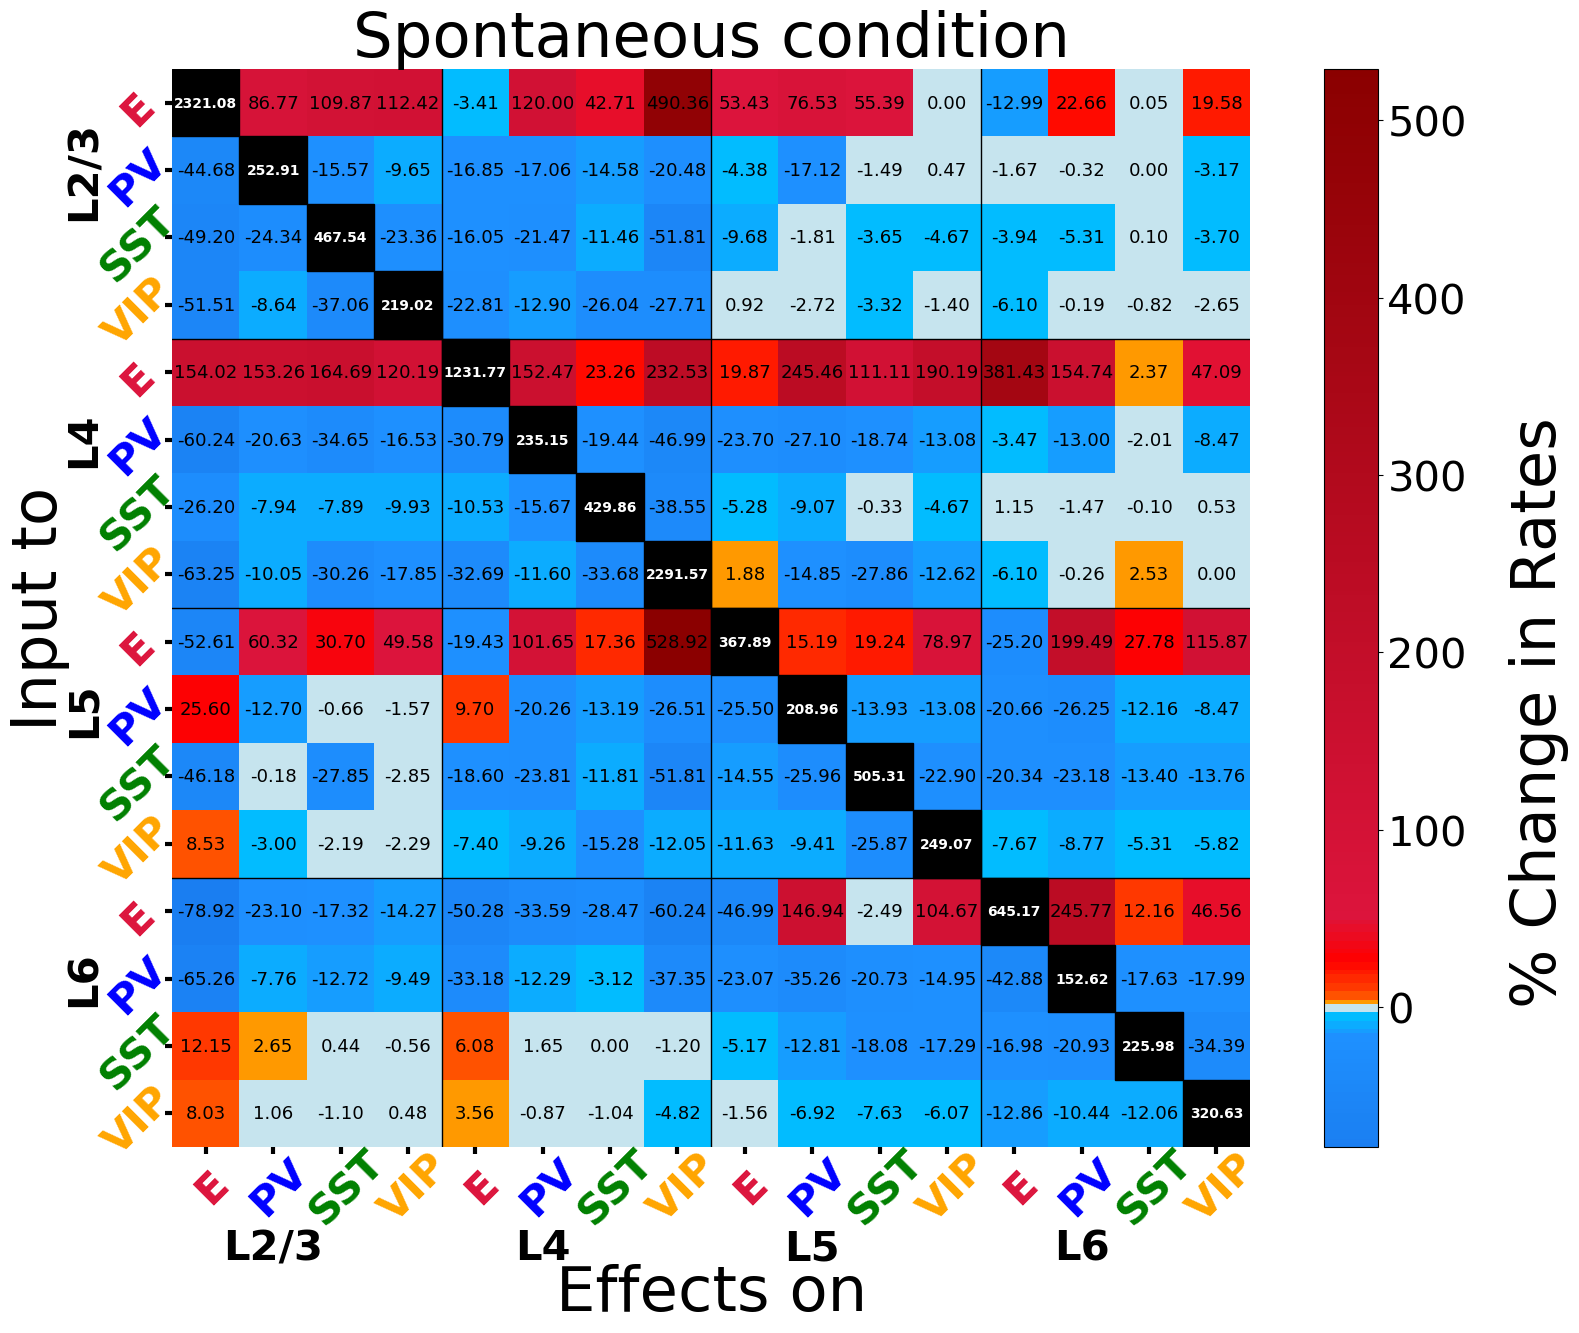

In [184]:
#I create the figure 
fig = plt.figure(figsize=(19, 14)) #create the figure


#norm = plt.Normalize(vmin=np.min(m_import)*100, vmax=np.max(m_import)*100)
norm = plt.Normalize(vmin=np.nanmin(m_import)*100, vmax=np.nanmax(m_import)*100)

#cmap='PRGn'
#Plot
mA_plot = sns.heatmap(np.array(m_import)*100,annot=True,cmap=custom_cmap,norm=norm,center=0,square=True,cbar=False, linewidths=0.,fmt=".2f", annot_kws={"size": 13, "color": "black"}) # plot GH with heatmap


# Add black diagonal with original values as white text
for i in range(len(original_diagonal_values)):
    mA_plot.add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color='black'))
    mA_plot.text(i+0.5, i+0.5, f'{original_diagonal_values[i]*100:.2f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')


mA_plot.tick_params(axis='both', which='major', width=3, length=5)
mA_plot.set_xticklabels([])
mA_plot.set_yticklabels([])

# Define your labels and their positions
layer_labels = ['L2/3', 'L4', 'L5', 'L6']
x_positions = [1.5, 5.5, 9.5, 13.5]  # X positions for the labels, centered in each block of 4
y_positions = [1.5, 5.5, 9.5, 13.5]  # Y positions for the labels, centered in each block of 4

# Add text labels for the X axis
for label, pos in zip(layer_labels, x_positions):
    plt.text(pos, 17.5, label, ha='center', va='center', fontsize=30, fontweight='bold')

# Add text labels for the Y axis
for label, pos in zip(layer_labels, y_positions):
    plt.text(-1.3, pos, label, ha='center', va='center', fontsize=30, fontweight='bold', rotation=90)

#Labels of the axis
cell_type_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP']
colors = ['crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange']
x_positions = np.arange(len(cell_type_labels))  # X positions for the labels

# Add colored text labels for the X axis
for label, color, pos in zip(cell_type_labels, colors, x_positions):
    #plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)
    #plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)

    plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)
    plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)

#Lines to guide the eye
for i in range(4, m_import.shape[0], 4):  # Start at 4 and count by 4s
    plt.axhline(i, color='black', linewidth=1)  # Horizontal line
    plt.axvline(i, color='black', linewidth=1)  # Vertical line

cbar = mA_plot.figure.colorbar(mA_plot.collections[0])
cbar_pos = cbar.ax.get_position()

# Set the position of the label. Adjust the x and y values as needed.
cbar.ax.text(4, 0,'% Change in Rates', rotation=90, va='bottom', ha='center', fontsize=45)

cax = mA_plot.figure.axes[-1]
cax.tick_params(labelsize=30)

#Labels of the axes
mA_plot.set_xlabel('Effects on', fontsize=45, labelpad=75)
mA_plot.set_ylabel('Input to', fontsize=45, labelpad=65)
#plt.title('Spontaneous condition',fontsize=45) #Fig 2A
#plt.title('Feedforward condition',fontsize=45)  #Fig 2B

plt.title('Spontaneous condition',fontsize=45) #Fig 2A
# plt.title('Condition: input to L6',fontsize=45) #Fig 2A
# plt.title('Condition: input to L2/3',fontsize=45) #Fig 2A
# plt.title('Condition: input to L5',fontsize=45) #Fig 2A
# plt.title('Condition: input to L5 & L2/3',fontsize=45) #Fig 2A
# plt.title('Condition: input to L5 & L2/3 & L6',fontsize=45) #Fig 2A
#plt.title('Condition: input to L4',fontsize=45) #Fig 2A
# plt.title('Condition: input to L4 & L5',fontsize=45) #Fig 2A

#Save the image
#Fig 2A:
#plt.savefig('../IMAGES/fig2_matrix_spont_colorsBlackblue.png', bbox_inches='tight')
#Fig 2B:
#plt.savefig('../IMAGES/fig2_matrix_FF_colorsBlackblue.png', bbox_inches='tight')


plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_spont.png', bbox_inches='tight')


# plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L6.png', bbox_inches='tight')
# plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L23.png', bbox_inches='tight')
# plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L5.png', bbox_inches='tight')
# plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L5_L23.png', bbox_inches='tight')
# plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L5_L23_L6.png', bbox_inches='tight')
#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L4.png', bbox_inches='tight')
# plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L4_L5.png', bbox_inches='tight')




plt.show(mA_plot)

In [155]:
#To better visualize the changes in firing rates we are creating a new matrix 

#I WANT A MATRIX with only 3 values:
# 1 if the fr is increased (by more than 20%)
# -1 if the fr is decreased (by more than 20%)
# 0 if is the same (less/more by less than 20%)

sign_matrix= [[1 for x in range(0,16)] for y in range(0,16)] #create the matrix filled with 0 

threshold=0.2

for h in range(0,16):
    for k in range(0,16):
        if m_import[h][k]>0 and m_import[h][k]>threshold :
            sign_matrix[h][k]=1
        elif abs(m_import[h][k])<threshold :
            sign_matrix[h][k]=0
        elif m_import[h][k]<0 and abs(m_import[h][k])>threshold :
            sign_matrix[h][k]=-1
#print(sign_matrix)

In [156]:
#Save the matrix in one file
#f=open('../simulations_data/REVISIONS_1/matrix/sign_baseline_20%.txt','w+') #Spontaneous

# f=open('../simulations_data/REVISIONS_1/matrix/sign_L6_20%.txt','w+') #Spontaneous
# f=open('../simulations_data/REVISIONS_1/matrix/sign_L23_20%.txt','w+') #Spontaneous
# f=open('../simulations_data/REVISIONS_1/matrix/sign_L5_20%.txt','w+') #Spontaneous
# f=open('../simulations_data/REVISIONS_1/matrix/sign_L5_L23_20%.txt','w+') #Spontaneous
# f=open('../simulations_data/REVISIONS_1/matrix/sign_L5_L23_L6_20%.txt','w+') #Spontaneous
f=open('../simulations_data/REVISIONS_1/matrix/sign_L4_20%.txt','w+') #Spontaneous
# f=open('../simulations_data/REVISIONS_1/matrix/sign_L4_L5_20%.txt','w+') #Spontaneous




for i in range(0,16):
    for j in range(0,16):
        f.write('%f ' %sign_matrix[i][j]) # write the value in the i,j position of the matrix 
    f.write('\n')
f.close()

In [195]:
#I import the matrix I just created
#sign_matrix=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_baseline_20%.txt') #Spontaneous

#sign_matrix=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_L6_20%.txt') #Spontaneous
#sign_matrix=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_sign_L23_20%.txt') #Spontaneous
#sign_matrix=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_sign_L5_20%.txt') #Spontaneous
#sign_matrix=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_L5_L23_20%.txt') #Spontaneous
sign_matrix=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_L4_20%.txt') #Spontaneous
#sign_matrix=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_L4_L5_20%.txt') #Spontaneous


In [196]:
#Fig. 2A and 2B, perturbation matrix 

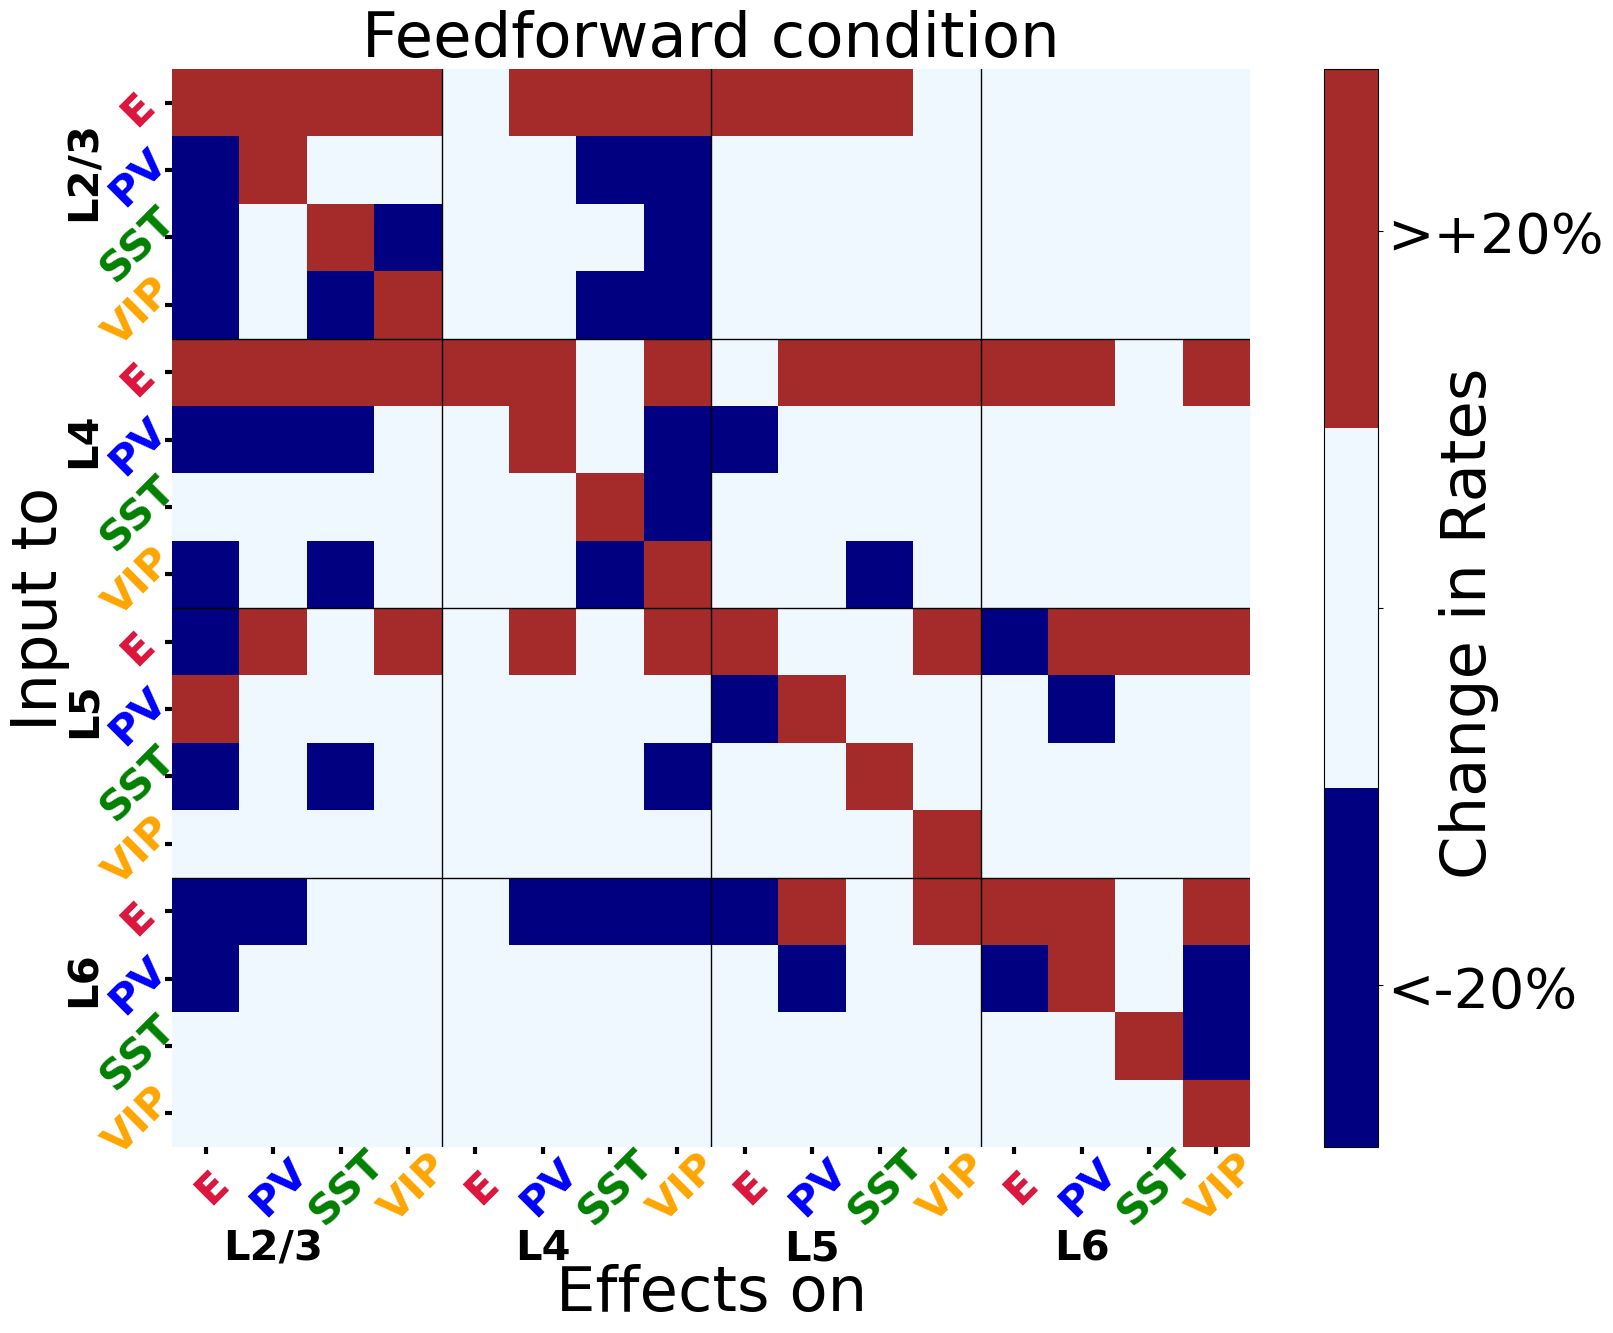

In [198]:
#I create the figure 
fig = plt.figure(figsize=(19, 14)) #create the figure



colors = ["navy", "aliceblue",'brown' ]#colors I want 
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
col_map=sns.color_palette(colors)

#Plot
mA_plot = sns.heatmap(np.array(sign_matrix),square=True,cmap=col_map,cbar=False, linewidths=0.) # plot GH with heatmap

mA_plot.tick_params(axis='both', which='major', width=3, length=5)
mA_plot.set_xticklabels([])
mA_plot.set_yticklabels([])

# Define your labels and their positions
layer_labels = ['L2/3', 'L4', 'L5', 'L6']
x_positions = [1.5, 5.5, 9.5, 13.5]  # X positions for the labels, centered in each block of 4
y_positions = [1.5, 5.5, 9.5, 13.5]  # Y positions for the labels, centered in each block of 4

# Add text labels for the X axis
for label, pos in zip(layer_labels, x_positions):
    plt.text(pos, 17.5, label, ha='center', va='center', fontsize=30, fontweight='bold')

# Add text labels for the Y axis
for label, pos in zip(layer_labels, y_positions):
    plt.text(-1.3, pos, label, ha='center', va='center', fontsize=30, fontweight='bold', rotation=90)

#Labels of the axis
cell_type_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP']
colors = ['crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange']
x_positions = np.arange(len(cell_type_labels))  # X positions for the labels

# Add colored text labels for the X axis
for label, color, pos in zip(cell_type_labels, colors, x_positions):
    #plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)
    #plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)

    plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)
    plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)

#Lines to guide the eye
for i in range(4, sign_matrix.shape[0], 4):  # Start at 4 and count by 4s
    plt.axhline(i, color='black', linewidth=1)  # Horizontal line
    plt.axvline(i, color='black', linewidth=1)  # Vertical line

cbar = mA_plot.figure.colorbar(mA_plot.collections[0])

#Set bar layout
colorbar = mA_plot.collections[0].colorbar
colorbar.set_ticks([-0.7, 0, 0.7])
colorbar.set_ticklabels(['<-20%', '', '>+20%'])
# colorbar.set_ticklabels(['>-10%', '0', '>10%'])
# colorbar.set_ticklabels(['>-30%', '0', '>30%'])
# colorbar.set_ticklabels(['>-50%', '0', '>50%'])

cbar_pos = cbar.ax.get_position()

# Set the position of the label. Adjust the x and y values as needed.
cbar.ax.text(2.7, -0.5, 'Change in Rates', rotation=90, va='bottom', ha='center', fontsize=45)

cax = mA_plot.figure.axes[-1]
cax.tick_params(labelsize=40)

#Labels of the axes
mA_plot.set_xlabel('Effects on', fontsize=45, labelpad=75)
mA_plot.set_ylabel('Input to', fontsize=45, labelpad=65)
#plt.title('Spontaneous condition',fontsize=45) #Fig 2A
# plt.title('Condition: input to L6',fontsize=45) #Fig 2A
# plt.title('Condition: input to L2/3',fontsize=45) #Fig 2A
# plt.title('Condition: input to L5',fontsize=45) #Fig 2A
# plt.title('Condition: input to L5 & L2/3',fontsize=45) #Fig 2A
# plt.title('Condition: input to L5 & L2/3 & L6',fontsize=45) #Fig 2A
plt.title('Condition: input to L4',fontsize=45) #Fig 2A
plt.title('Feedforward condition',fontsize=45) #Fig 2A

# plt.title('Condition: input to L4 & L5',fontsize=45) #Fig 2A





#Save the image
#Fig 2A:
#plt.savefig('../IMAGES/REVISIONS_1/fig2_matrix_spont.png', bbox_inches='tight')
#Fig 2B:
#plt.savefig('../IMAGES/fig2_matrix_FF.png', bbox_inches='tight')

#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_spont_20%.png', bbox_inches='tight')


#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L6_20%.png', bbox_inches='tight')
#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L23_20%.png', bbox_inches='tight')
#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L5_20%.png', bbox_inches='tight')
#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L5_L23_20%.png', bbox_inches='tight')
#plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L5_L23_L6_20%.png', bbox_inches='tight')
plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L4_20%.png', bbox_inches='tight')
# plt.savefig('../IMAGES/REVISIONS_1/fig_matrix_L4_L5_20%.png', bbox_inches='tight')



plt.show(mA_plot)

In [120]:
#Fig. 2C
#Comparison between two matrices

In [160]:
#Comparison Feedforward and spontaneous 
sign_baseline=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_baseline_20%.txt') #Spontaneous
sign_input=np.loadtxt('../simulations_data/REVISIONS_1/matrix/sign_L4_20%.txt')     #FF

In [161]:
sign_matrix_diff= [[0 for x in range(0,16)] for y in range(0,16)] #create the matrix filled with 0 
#0 means no change (between the two matrices)
#1 means change increase: from -1 to 0, 0 to 1, -1 to 1
#- 1 means change decrease: from 1 to 0, from 0 to -1
for h in range(0,16):
    for k in range(0,16):
        if sign_baseline[h][k]== sign_input[h][k]:
            sign_matrix_diff[h][k]=0  
    
        if sign_baseline[h][k]== 1 and sign_input[h][k]==0 :
            sign_matrix_diff[h][k]=-1
        if sign_baseline[h][k]==0 and sign_input[h][k]==-1:
            sign_matrix_diff[h][k]=-1    

        if sign_baseline[h][k]== -1 and sign_input[h][k]==0 :
            sign_matrix_diff[h][k]=1
        if sign_baseline[h][k]==0 and sign_input[h][k]==1:
            sign_matrix_diff[h][k]=1
            

        if sign_baseline[h][k]==1 and sign_input[h][k]==-1:
            sign_matrix_diff[h][k]=-1
        if sign_baseline[h][k]==-1 and sign_input[h][k]==1:
            sign_matrix_diff[h][k]=1

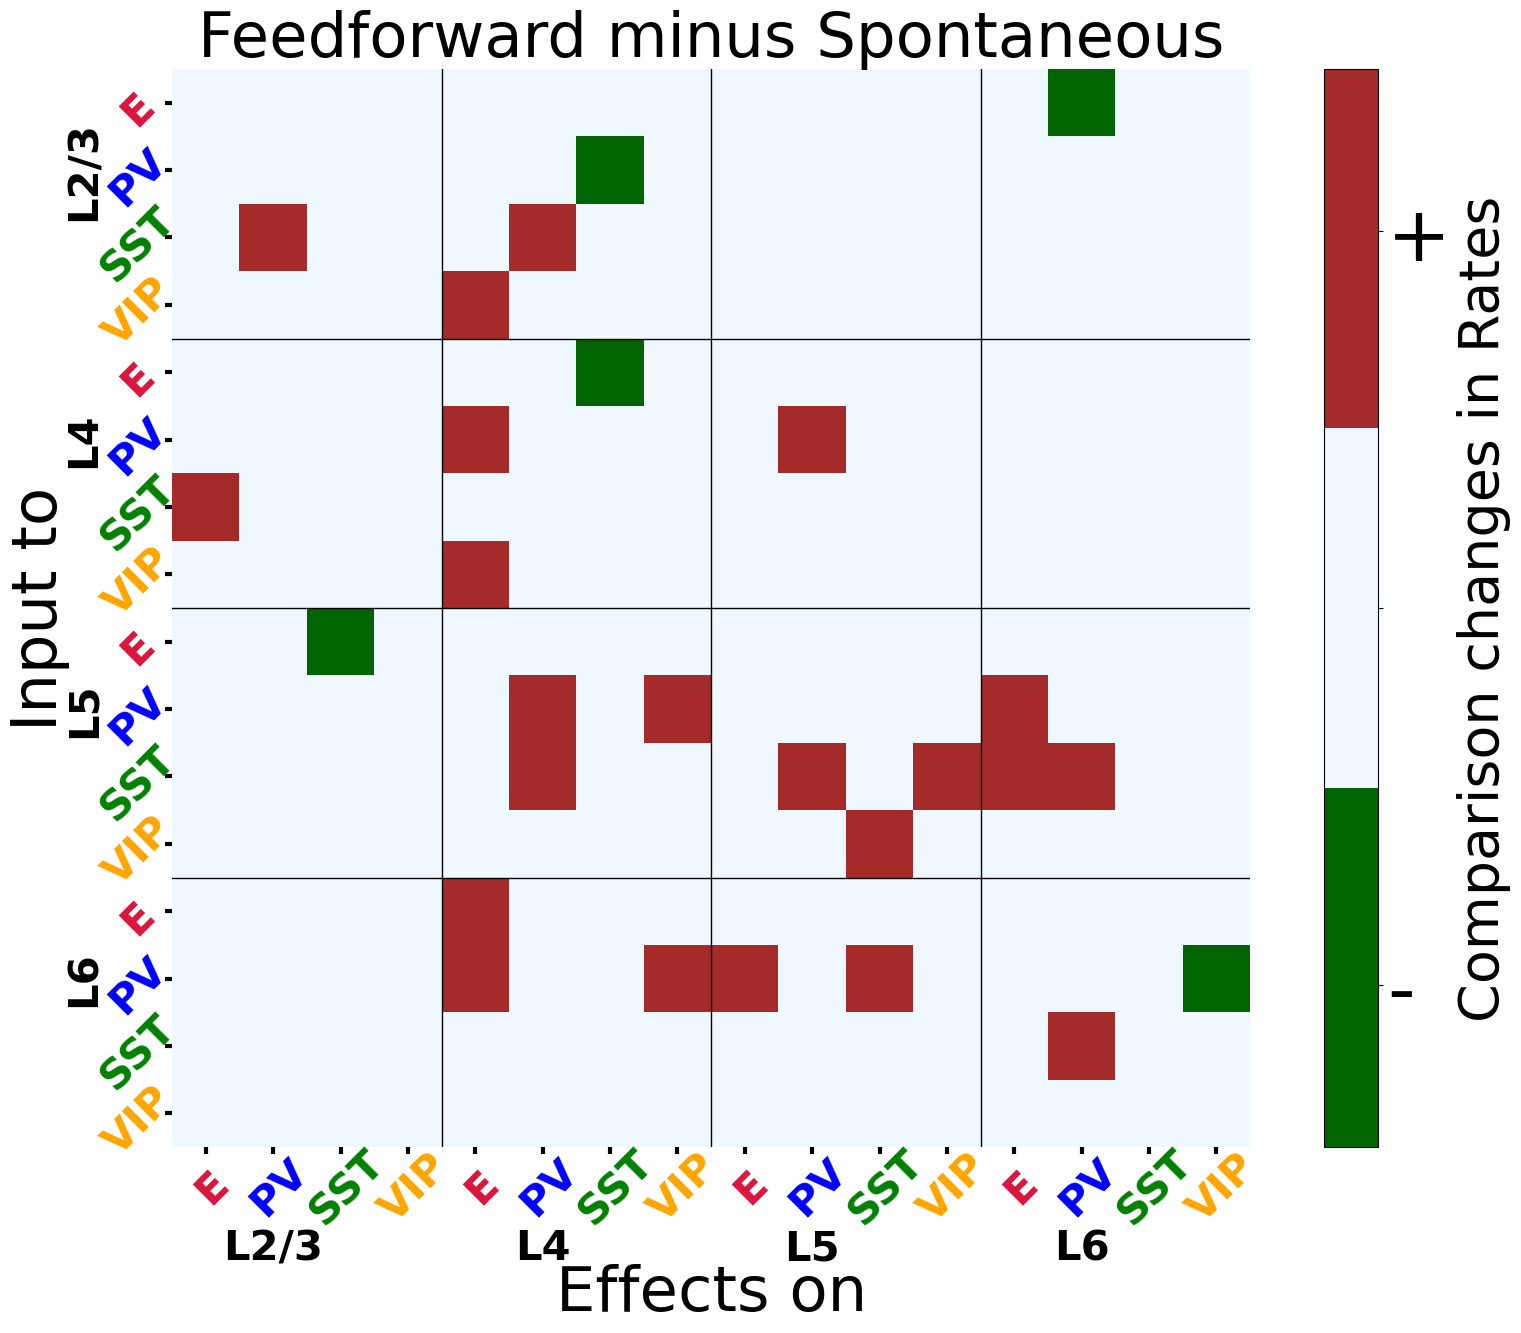

In [162]:
#Create the matrix plot 
fig = plt.figure(figsize=(19, 14)) #create the figure

colors = ["darkgreen", "aliceblue",'brown' ] #colors

# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
col_map=sns.color_palette(colors)

#Plot
mA_plot = sns.heatmap(np.array(sign_matrix_diff),square=True,cmap=col_map,cbar=False,xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidths=0.) # plot GH with heatmap

#Layout matrix
mA_plot.tick_params(axis='both', which='major', width=3, length=5)
mA_plot.set_xticklabels([])
mA_plot.set_yticklabels([])

# Define your labels and their positions
layer_labels = ['L2/3', 'L4', 'L5', 'L6']
x_positions = [1.5, 5.5, 9.5, 13.5]  # X positions for the labels, centered in each block of 4
y_positions = [1.5, 5.5, 9.5, 13.5]  # Y positions for the labels, centered in each block of 4

# Add text labels for the X axis
for label, pos in zip(layer_labels, x_positions):
    plt.text(pos, 17.5, label, ha='center', va='center', fontsize=30, fontweight='bold')

# Add text labels for the Y axis
for label, pos in zip(layer_labels, y_positions):
    plt.text(-1.3, pos, label, ha='center', va='center', fontsize=30, fontweight='bold', rotation=90)

    
cell_type_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP']
colors = ['crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange']
x_positions = np.arange(len(cell_type_labels))  # X positions for the labels

# Add colored text labels for the X axis
for label, color, pos in zip(cell_type_labels, colors, x_positions):
    plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)
    plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)
    

#Lines to guide the eye
for i in range(4, sign_matrix.shape[0], 4):  # Start at 4 and count by 4s
    plt.axhline(i, color='black', linewidth=1)  # Horizontal line
    plt.axvline(i, color='black', linewidth=1)  # Vertical line

cbar = mA_plot.figure.colorbar(mA_plot.collections[0])

#Set bar layout
colorbar = mA_plot.collections[0].colorbar
colorbar.set_ticks([-0.7, 0, 0.7])
colorbar.set_ticklabels(['-', '', '+'])
colorbar.set_label("Comparison changes in Rates",size=40)
cax = mA_plot.figure.axes[-1]
cax.tick_params(labelsize=55)

#Labels of the axes
mA_plot.set_xlabel('Effects on', fontsize=45, labelpad=75)
mA_plot.set_ylabel('Input to', fontsize=45, labelpad=65)
plt.title('Feedforward minus Spontaneous',fontsize=45)

#Save fig
plt.savefig('../IMAGES/REVISIONS_1/fig2_matrix_diff_spo_FF.png', bbox_inches='tight')

plt.show(mA_plot)

In [185]:
m_import_base=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_spont.txt') #For spontaneous
m_import_ff=np.loadtxt('../simulations_data/REVISIONS_1/matrix/MATRIX_L4.txt')   #For FF

m_diff = m_import_ff - m_import_base

In [186]:
#THis is to find the values for the color map
matrix=m_diff
# Step 1: Identify positive values
positive_values = matrix[matrix > 0]

# Step 2: Sort the positive values
sorted_positive_values = np.sort(positive_values)
print(sorted_positive_values)
# Step 3: Select values at regular intervals
interval = int(len(sorted_positive_values)/5) # Example interval, you can choose the desired interval
selected_values = sorted_positive_values[interval::interval]
print(selected_values)

selected_values_new=(selected_values/(2*np.max(matrix)))+0.5
print(selected_values_new)



negative_values = matrix[matrix < 0]

# Step 2: Sort the positive values
sorted_negative_values = np.sort(negative_values)
print(sorted_negative_values)
# Step 3: Select values at regular intervals
interval_neg = int(len(sorted_negative_values)/5) # Example interval, you can choose the desired interval
selected_values_neg = sorted_negative_values[::interval_neg]
print(selected_values_neg)

selected_values_neg_new=0.5+(selected_values_neg/(2*np.abs(np.min(matrix))))
print(selected_values_neg_new)

[0.000489 0.000698 0.00136  0.001467 0.001568 0.00192  0.002737 0.002919
 0.002987 0.003082 0.003295 0.003473 0.003657 0.004038 0.004082 0.004664
 0.005108 0.00514  0.005433 0.005441 0.006276 0.006954 0.006993 0.007031
 0.007441 0.007619 0.008214 0.00863  0.010128 0.01064  0.01087  0.01093
 0.011656 0.01203  0.012205 0.013639 0.014271 0.014495 0.015419 0.016276
 0.016895 0.019913 0.020022 0.022518 0.022608 0.022846 0.022928 0.023129
 0.023432 0.023657 0.024551 0.024686 0.024831 0.025012 0.025336 0.02559
 0.026129 0.026514 0.026896 0.028762 0.029465 0.030497 0.030806 0.032375
 0.032382 0.032458 0.034243 0.034702 0.035149 0.036498 0.037481 0.037855
 0.037955 0.037989 0.037994 0.040908 0.041927 0.042462 0.04247  0.04249
 0.043156 0.043182 0.04329  0.043788 0.044237 0.045685 0.046047 0.046637
 0.04732  0.0478   0.048027 0.048107 0.048193 0.048927 0.049387 0.049844
 0.050764 0.050784 0.051077 0.051592 0.051619 0.052727 0.053305 0.05406
 0.054281 0.054597 0.054636 0.056205 0.057255 0.058201 

In [187]:
# Store the original diagonal values
original_diagonal_values = np.diag(m_diff).copy()

print(original_diagonal_values)
# Set the diagonal elements to NaN to exclude them from the colormap
np.fill_diagonal(m_diff, np.nan)



[-10.888298  -0.986572  -2.123403  -0.766752 -11.611803  -1.31681
  -0.513564 -11.957114  -0.319876  -1.166876  -1.719082  -1.41504
  -4.292621  -0.703976  -0.073759  -0.557369]


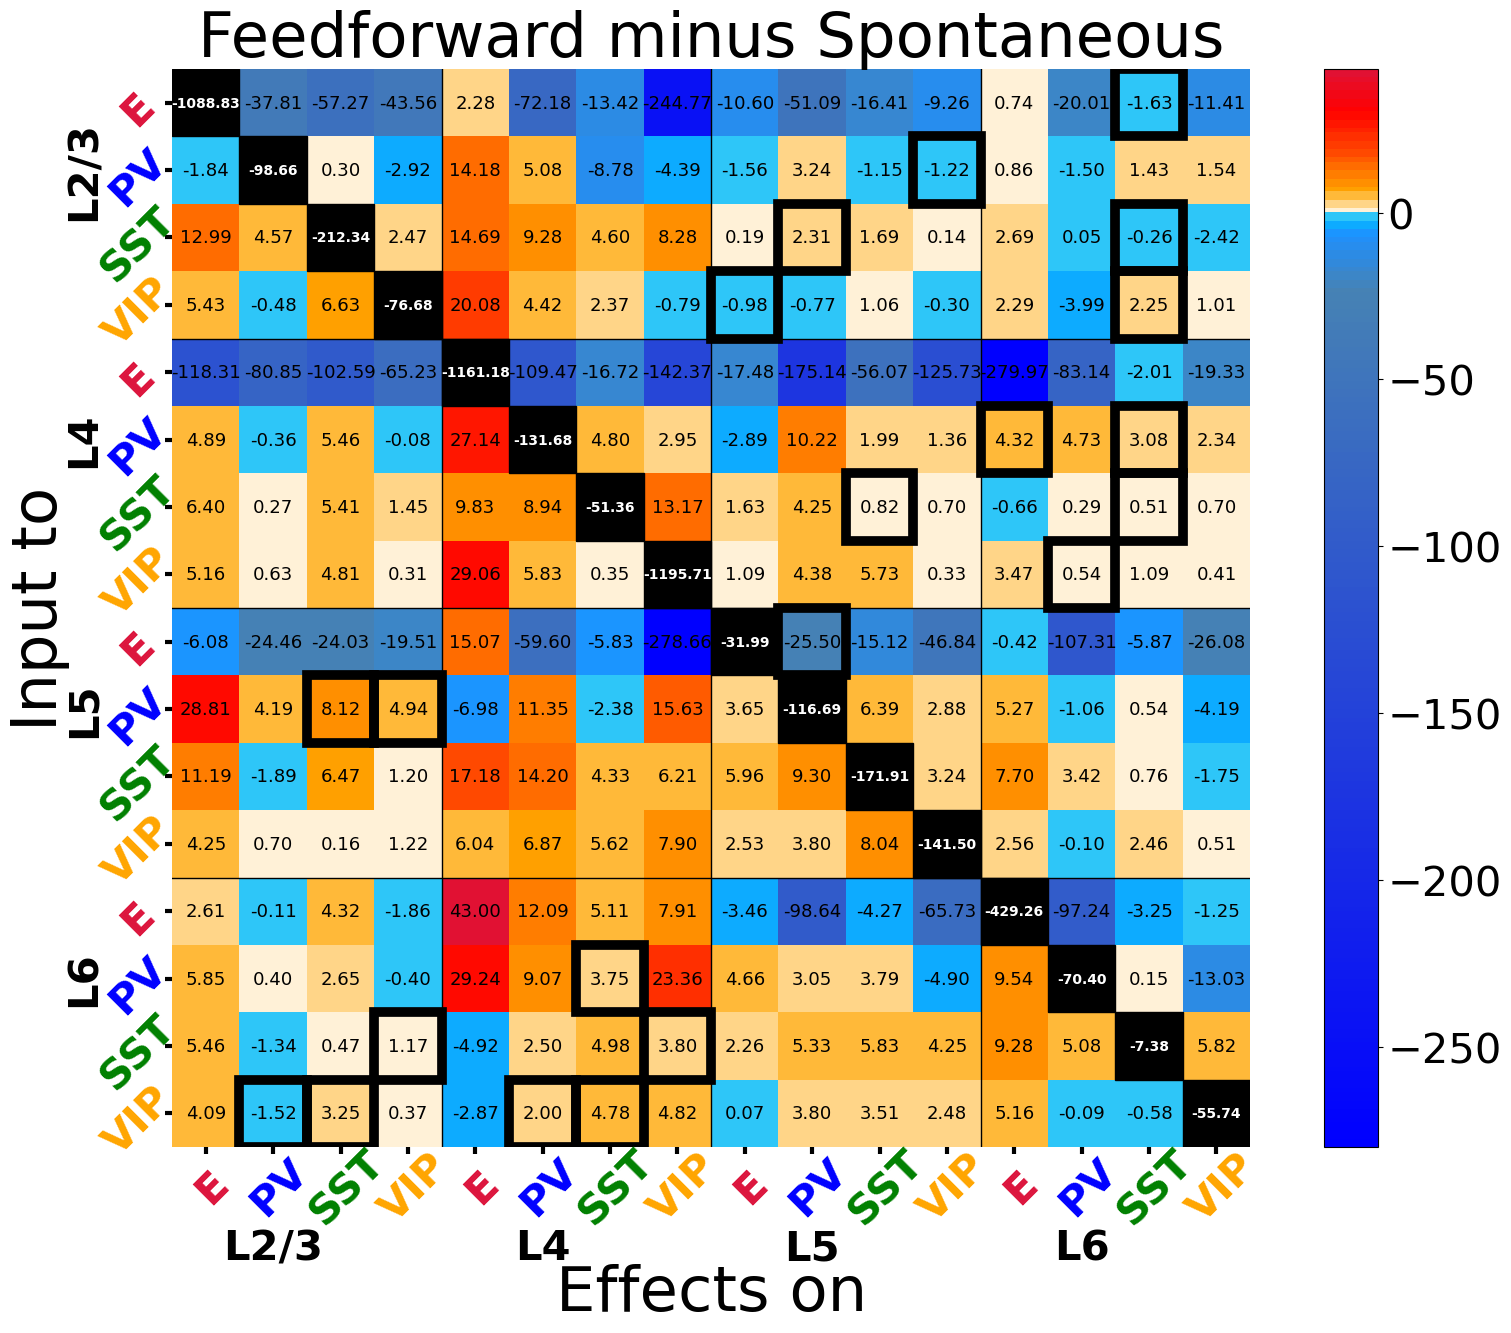

In [191]:
#I create the figure 
fig = plt.figure(figsize=(19, 14)) #create the figure

colors = [(0, 'blue'),
          (selected_values_neg_new[1], 'steelblue'),
          (selected_values_neg_new[2], 'dodgerblue'),
          (selected_values_neg_new[3], 'deepskyblue'),
          (selected_values_neg_new[4], 'lightblue'),
          (0.5, 'white'),
          (selected_values_new[0], 'orange'),
          (selected_values_new[1], 'orangered'),
          (selected_values_new[2], 'red'),
          (selected_values_new[3], 'crimson'), 
          (1, 'darkred')]




# colors = [(0, 'darkblue'),
#           (selected_values_neg_new[1], 'blue'),
#           (selected_values_neg_new[2], 'steelblue'),
#           (selected_values_neg_new[3], 'deepskyblue'),
#           (selected_values_neg_new[4], 'lightblue'),
#           (0.5, 'white'),
#           (selected_values_new[0], 'orange'),
#           (selected_values_new[1], 'orangered'),
#           (selected_values_new[2], 'red'),
#           (selected_values_new[3], 'crimson'), 
#           (1, 'darkred')]

matrix1=m_import_ff  
matrix2=m_import_base

highlight_mask = ((matrix1 > 0) & (matrix2 < 0)) | ((matrix1 < 0) & (matrix2 > 0))


# Create a colormap that maps the given colors to values between 0 and 1
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

norm = plt.Normalize(vmin=np.nanmin(m_diff)*100, vmax=np.nanmax(m_diff)*100)


#norm = plt.Normalize(vmin=np.min(m_diff)*100, vmax=np.max(m_diff)*100)
#cmap='PRGn'
#cmap=custom_cmap
#Plot
mA_plot = sns.heatmap(np.array(m_diff)*100,annot=True,cmap=custom_cmap,norm=norm,center=0,square=True,cbar=False, linewidths=0.,fmt=".2f", annot_kws={"size": 13, "color": "black"}) # plot GH with heatmap

mA_plot.tick_params(axis='both', which='major', width=3, length=5)
mA_plot.set_xticklabels([])
mA_plot.set_yticklabels([])

# Define your labels and their positions
layer_labels = ['L2/3', 'L4', 'L5', 'L6']
x_positions = [1.5, 5.5, 9.5, 13.5]  # X positions for the labels, centered in each block of 4
y_positions = [1.5, 5.5, 9.5, 13.5]  # Y positions for the labels, centered in each block of 4


# Add black diagonal with original values as white text
for i in range(len(original_diagonal_values)):
    mA_plot.add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color='black'))
    mA_plot.text(i+0.5, i+0.5, f'{original_diagonal_values[i]*100:.2f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')



# Add text labels for the X axis
for label, pos in zip(layer_labels, x_positions):
    plt.text(pos, 17.5, label, ha='center', va='center', fontsize=30, fontweight='bold')

# Add text labels for the Y axis
for label, pos in zip(layer_labels, y_positions):
    plt.text(-1.3, pos, label, ha='center', va='center', fontsize=30, fontweight='bold', rotation=90)

#Labels of the axis
cell_type_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP']
colors = ['crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange','crimson', 'blue', 'green', 'orange']
x_positions = np.arange(len(cell_type_labels))  # X positions for the labels

# Add colored text labels for the X axis
for label, color, pos in zip(cell_type_labels, colors, x_positions):
    #plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)
    #plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=27, rotation=45, fontweight='bold', color=color)

    plt.text(pos+0.6, 16.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)
    plt.text(-0.5, pos+0.6, label, ha='center', va='center', fontsize=30, rotation=45, fontweight='bold', color=color)

#Lines to guide the eye
for i in range(4, m_diff.shape[0], 4):  # Start at 4 and count by 4s
    plt.axhline(i, color='black', linewidth=1)  # Horizontal line
    plt.axvline(i, color='black', linewidth=1)  # Vertical line

cbar = mA_plot.figure.colorbar(mA_plot.collections[0])
cbar_pos = cbar.ax.get_position()
#cbar.ax.text(0, 0,'% Change in Rates', rotation=90, va='bottom', ha='center', fontsize=45)

# Set the position of the label. Adjust the x and y values as needed.
#cbar.ax.text(4, -910,'% Change in Rates', rotation=90, va='bottom', ha='center', fontsize=45)

cax = mA_plot.figure.axes[-1]
cax.tick_params(labelsize=30)

#Labels of the axes
mA_plot.set_xlabel('Effects on', fontsize=45, labelpad=75)
mA_plot.set_ylabel('Input to', fontsize=45, labelpad=65)
plt.title('Feedforward minus Spontaneous',fontsize=45)

for i in range(highlight_mask.shape[0]):
    for j in range(highlight_mask.shape[1]):
        if highlight_mask[i, j]:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=7))


#Save the image
#plt.savefig('../IMAGES/fig2_matrix_diff_colors.png', bbox_inches='tight')
plt.savefig('../IMAGES/REVISIONS_1/fig2_matrix_diff_colors_Blackblue.png', bbox_inches='tight')

plt.show(mA_plot)